## 심리성향 예측 AI 경진대회

|변수|설명|
|-----|----|
|index|번호|
|Q_A (a~t)|비식별화를 위해 일부 질문은 Secret 처리(1=Disagree, 2=Slightly disagree, 3=Neutral, 4=Slightly agree, 5=Agree.)|
|Q_E (a~t)| 해당 문항에 답하는 시간|
|Qa|Secret|
|Qb|The biggest difference between most criminals and other people is that the criminals are stupid enough to get caught.(대부분의 범죄자와 다른 사람들의 가장 큰 차이점은 범죄자들이 잡힐 만큼 어리석다는 것입니다.)|
|Qc|Anyone who completely trusts anyone else is asking for trouble.(다른 사람을 완전히 신뢰하는 사람은 문제를 요구하는 것입니다.)|
|Qd|Secret|
|Qe|P.T. Barnum was wrong when he said that there's a sucker born every minute.(PT Barnum은 매분마다 태어난다고 말한 것은 틀렸습니다.)|
|Qf|There is no excuse for lying to someone else.(남에게 거짓말을 하는 것은 변명의 여지가 없다)|
|Qg|Secret|
|Qh|Most people forget more easily the death of their parents than the loss of their property.(대부분의 사람들은 재산을 잃는 것보다 부모의 죽음을 더 쉽게 잊는다)|
|Qi|Secret|
|Qj|It is safest to assume that all people have a vicious streak and it will come out when they are given a chance.(모든 사람에게 악의가 있고 기회가 있을 때 나타날 것이라고 가정하는 것이 가장 안전합니다.)|
|Qk|All in all, it is better to be humble and honest than to be important and dishonest.(대체로 중요하고 부정직한 것보다 겸손하고 부정직한 것이 더 낫습니다.)|
|Ql|Secret|
|Qm|It is hard to get ahead without cutting corners here and there.(여기 저기 모퉁이를 자르지 않고는 앞서가기 어렵다)|
|Qn|Secret|
|Qo|The best way to handle people is to tell them what they want to hear.(사람들을 다루는 가장 좋은 방법은 그들이 듣고 싶은 말을 하는 것이다)|
|Qp|Secret|
|Qq|Most people are basically good and kind.(대부분의 사람들은 기본적으로 착하고 친절합니다.)|
|Qr|One should take action only when sure it is morally right.(One should take action only when sure it is morally right.)|
|Qs|It is wise to flatter important people.(중요한 사람에게 아첨하는 것이 현명합니다.)|
|Qt|Secret|
|age_group|연령|
|education|교육 수준 (1=Less than high school, 2=High school, 3=University degree, 4=Graduate degree, 0=무응답)|
|engnat|모국어가 영어 (1=Yes, 2=No, 0=무응답)|
|familysize|형제자매 수|
|gender|성별 (Male, Female)|
|hand|필기하는 손 (1=Right, 2=Left, 3=Both, 0=무응답)|
|married|혼인 상태 (1=Never married, 2=Currently married, 3=Previously married, 0=Other)|
|race|인종 (Asian, Arab, Black, Indigenous Australian, Native American, White, Other)|
|religion|종교 (Agnostic, Atheist, Buddhist, Christian_Catholic, Christian_Mormon, Christian_Protestant, Christian_Other, Hindu, Jewish, Muslim, Sikh, Other)|
|tp__(01~07)|items were rated "I see myself as:" _____ such that( 나는 나를 이렇게 생각한다)|
|tp01|Extraverted, enthusiastic.(외향적, 열정적)|
|tp02|Critical, quarrelsome.(크리티컬, 다툼)|
|tp03|Dependable, self-disciplined.(신뢰할 수 있는, 자제력 있는)|
|tp04|Anxious, easily upset.(불안하고 화를 쉽게 낸다)|
|tp05|Open to new experiences, complex.(오픈 마인드, 복잡함)|
|tp06|Reserved, quiet.(예약된, 조용한)|
|tp07|Sympathetic, warm.(동정심, 따뜻함)|
|tp08|Disorganized, careless.(무질서하고 부주의한)|
|tp09|Calm, emotionally stable.(차분하고 정서적으로 안정된)|
|tp10|Conventional, uncreative.(기존의, 창의적이지 않은)|
|urban|유년기의 거주 구역(1=Rural (country side), 2=Suburban, 3=Urban (town, city), 0=무응답)|
|wr_(01~13)|실존하는 해당 단어의 정의을 앎 (1=Yes, 0=No)|
|wf_(01~03)|허구인 단어의 정의를 앎 (1=Yes, 0=No)|
|voted (타겟)|지난 해 국가 선거 투표 여부 (1=Yes, 2=No)|

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='New Gulim')
colors=['#FFCA08','#F8931D','#EC7016','#CE8D3E','#FBBE77']

### 데이터 로드

In [2]:
train = pd.read_csv('train.csv')
test = pd. read_csv('test_x.csv')
sample_submission = pd.read_csv('sample_submission.csv')

### 결측값 확인

In [3]:
train.isnull().sum()
test.isnull().sum()

index    0
QaA      0
QaE      0
QbA      0
QbE      0
        ..
wr_09    0
wr_10    0
wr_11    0
wr_12    0
wr_13    0
Length: 77, dtype: int64

### 변수 확인

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45532 entries, 0 to 45531
Data columns (total 78 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       45532 non-null  int64  
 1   QaA         45532 non-null  float64
 2   QaE         45532 non-null  int64  
 3   QbA         45532 non-null  float64
 4   QbE         45532 non-null  int64  
 5   QcA         45532 non-null  float64
 6   QcE         45532 non-null  int64  
 7   QdA         45532 non-null  float64
 8   QdE         45532 non-null  int64  
 9   QeA         45532 non-null  float64
 10  QeE         45532 non-null  int64  
 11  QfA         45532 non-null  float64
 12  QfE         45532 non-null  int64  
 13  QgA         45532 non-null  float64
 14  QgE         45532 non-null  int64  
 15  QhA         45532 non-null  float64
 16  QhE         45532 non-null  int64  
 17  QiA         45532 non-null  float64
 18  QiE         45532 non-null  int64  
 19  QjA         45532 non-nul

### 연령 분포 확인
#### 연령_그룹화

In [5]:
cnt=train.groupby(['age_group'],as_index=False).count()

Text(0.5, 1.0, '연령 비율')

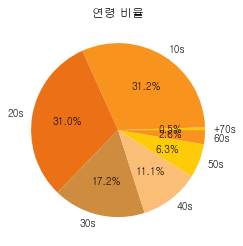

In [6]:
#연령대 별 비율

colors=['#FFCA08','#F8931D','#EC7016','#CE8D3E','#FBBE77']
plt.pie(cnt['index'], labels=cnt['age_group'],autopct='%.1f%%', colors=colors)
plt.title('연령 비율')

#10대, 20대가 가장 많고 60,70대가 가장 비율이 낮다

#### 연령_응답

In [7]:
x = ['10s','20s','30s','40s','50s','60s','+70s']
x
age_group = round(train.groupby(['age_group'], as_index = False).mean())
age_group

,age_group,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,+70s,22764.0,2.0,1179.0,2.0,1920.0,3.0,1614.0,2.0,1486.0,...,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
1,10s,22989.0,2.0,776.0,3.0,1962.0,4.0,1365.0,2.0,1572.0,...,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
2,20s,22673.0,2.0,923.0,3.0,2384.0,4.0,1530.0,2.0,1457.0,...,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
3,30s,22647.0,2.0,880.0,3.0,2450.0,4.0,1666.0,2.0,1447.0,...,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
4,40s,22688.0,2.0,926.0,3.0,1943.0,4.0,1372.0,2.0,1448.0,...,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
5,50s,22345.0,2.0,1837.0,2.0,2057.0,3.0,1451.0,2.0,1440.0,...,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
6,60s,23314.0,3.0,1534.0,2.0,2297.0,3.0,1696.0,2.0,1509.0,...,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0


In [8]:
age_QA =age_group.iloc[:,2:42:2]
age_QA.index = x

age_QE = age_group.iloc[:,3:42:2]
age_QE.index = x
#초단위?

연령대에 따른 답변 평균과 답변 응답 시간 평균
세대에 따른 가치관 차이가 있을 것이다
답변에 대한 점수에 따라 가치관 차이가 나올 듯

답변 응답시간에 따라 세대별 혼동하는 가치관이 드러날것이라 생각

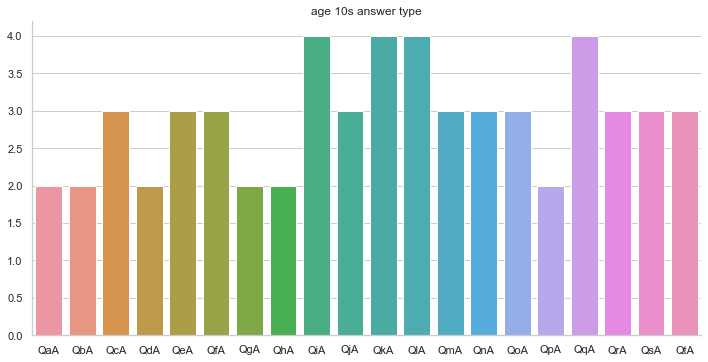

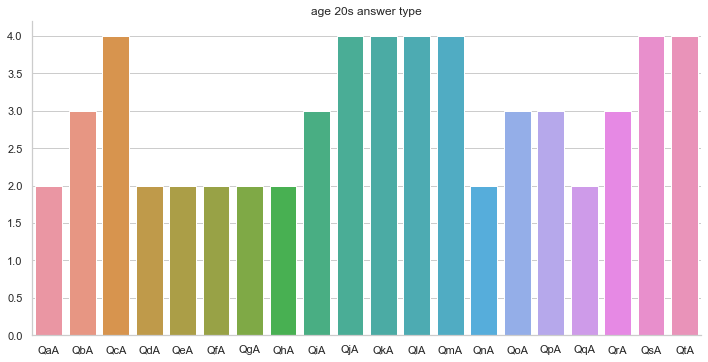

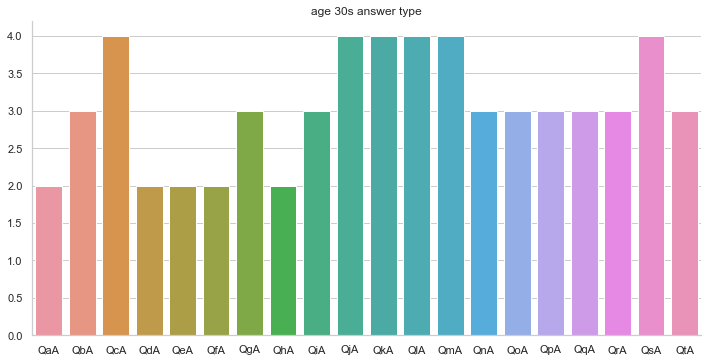

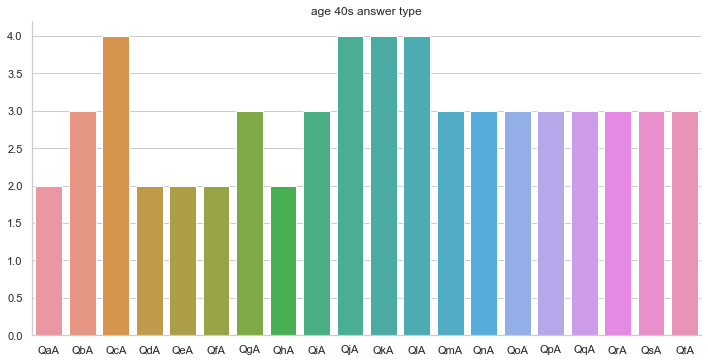

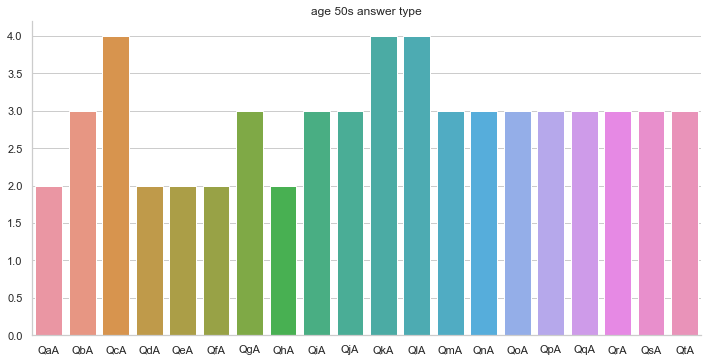

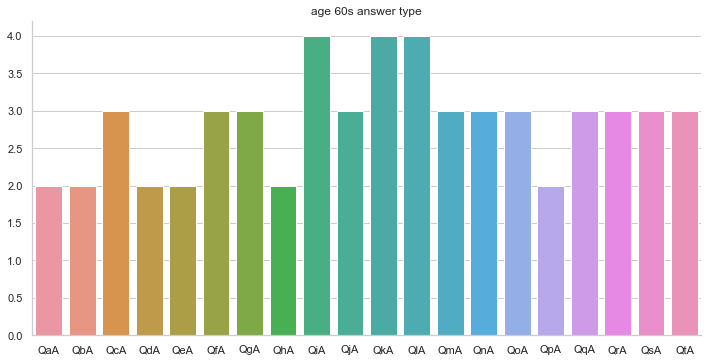

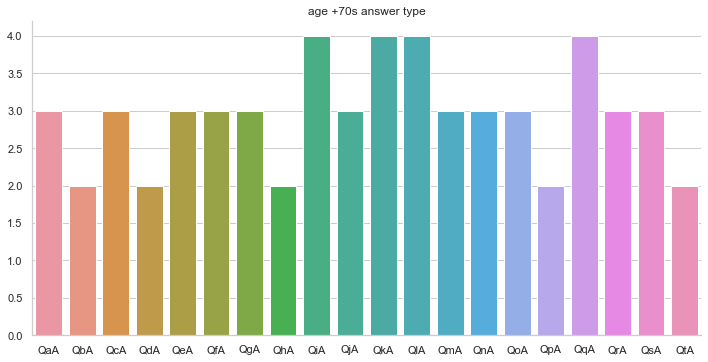

In [9]:
for i in range(len(x)):
    sns.set_theme(style='whitegrid')
    sns.catplot(data=age_QA[i:i+1], kind='bar',ci=None,aspect=16/8)
    plt.title("age "+ x[i]+" answer type")

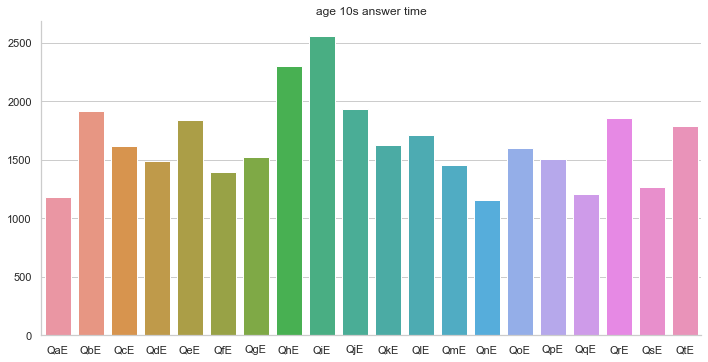

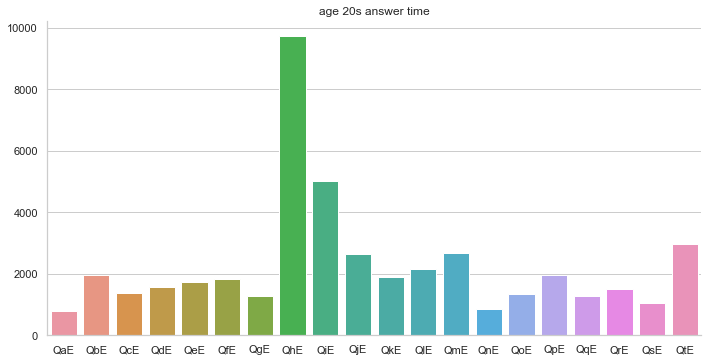

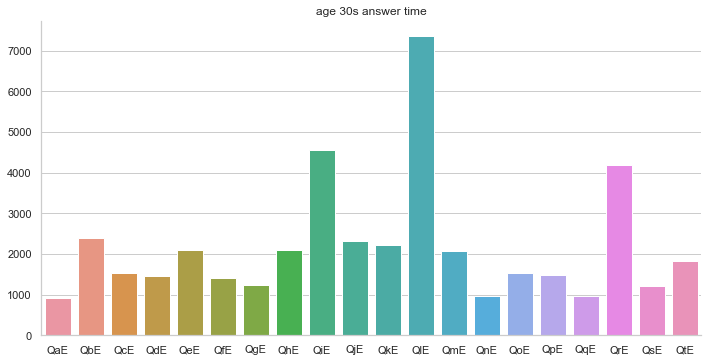

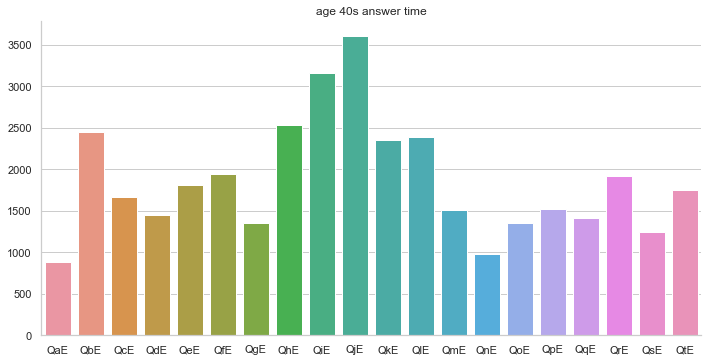

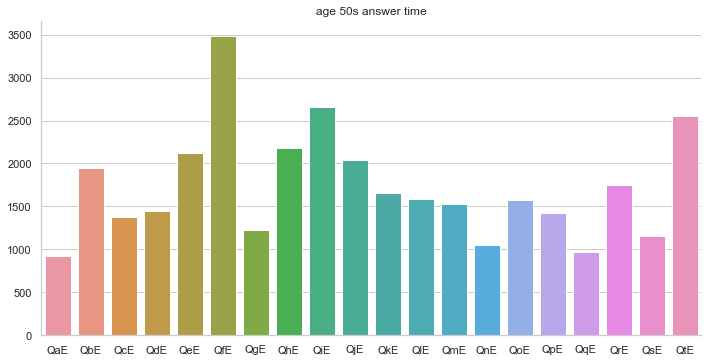

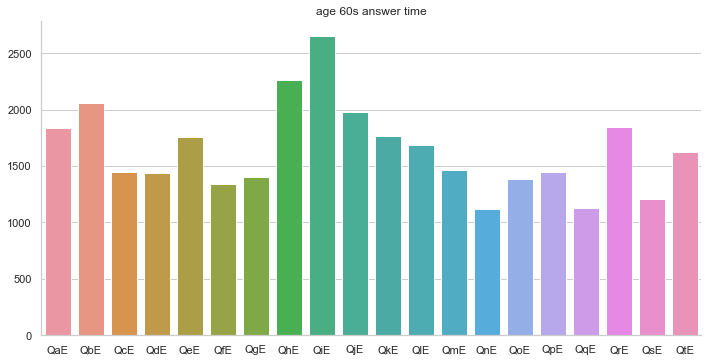

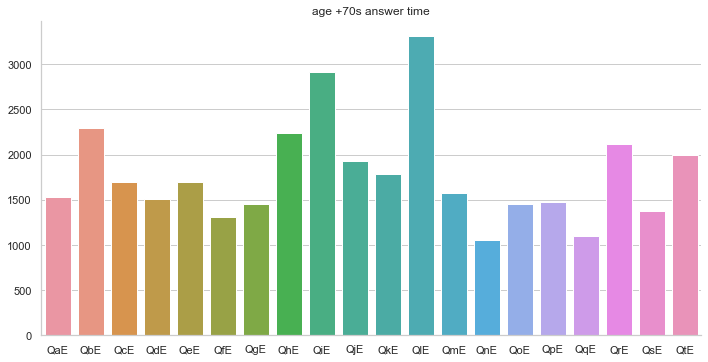

In [10]:
for i in range(len(x)):
    sns.set_theme(style='whitegrid')
    sns.catplot(data=age_QE[i:i+1], kind='bar',ci=None,aspect=16/8)
    plt.title("age "+ x[i]+" answer time")

전체 추이
연령이 높아질 수록 응답 시간이 길어지는 것을 확인 가능
전체적으로 5점 (x)
i,j,k,l 부분의 점수가 대체로 높은 경향


|연령|답변|시간|
|----|----|----|
|10대|c,i,j,k,l,q,s,t|h|
|20대|c,i,j.k,l,q,s|l|
|30대|c,i,k,l|j,i|
|40대|c,k,l|f|
|50대|i,k,l|i,h|
|60대|c,k,l|i,l|
|+70|i,k,l,q|i|

### 연령_투표여부_비율

In [11]:
for i in range(len(train)):
    if train['voted'][i] == 2:
        train['voted'][i] = 0

<ipython-input-11-b3b498bc15e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['voted'][i] = 0


In [12]:
#연령별 투표율
train.groupby(['age_group']).sum()['voted'] / train.groupby(['age_group']).count()['voted']

age_group
+70s    0.736170
10s     0.162786
20s     0.530329
30s     0.588821
40s     0.642051
50s     0.670128
60s     0.728643
Name: voted, dtype: float64

In [13]:
a_10 = train[train['age_group'] == '10s']
av_10 = a_10[a_10['voted'] == 1]
av_10
#투표율   0.1627857896588111
len(av_10)/14215

a_20 = train[train['age_group'] == '20s']
av_20 = a_20[a_20['voted'] == 1]
av_20
#투표율   0.530328798185941
len(av_20)/14112

a_30 = train[train['age_group'] == '30s']
av_30 = a_30[a_30['voted'] == 1]
av_30
#투표율   0.5888208269525268
len(av_30)/7836

a_40 = train[train['age_group'] == '40s']
av_40 = a_40[a_40['voted'] == 1]
av_40
#투표율   0.6420510789942586
len(av_40)/5051

a_50 = train[train['age_group'] == '50s']
av_50 = a_50[a_50['voted'] == 1]
av_50
#투표율   0.6701280719972309
len(av_50)/2889

a_60 = train[train['age_group'] == '60s']
av_60 = a_60[a_60['voted'] == 1]
av_60
#투표율   0.7286432160804021
len(av_60)/1194

a_70 = train[train['age_group'] == '+70s']
av_70 = a_70[a_70['voted'] == 1]
av_70
#투표율   0.7361702127659574
len(av_70)/235

0.7361702127659574

Text(0.5, 1.0, '연령대 별 투표 비율')

C:\Users\juyeo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\juyeo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47161 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\juyeo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\juyeo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\juyeo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53804 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\juyeo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54364 missing from c

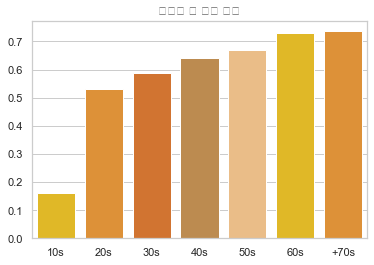

In [14]:
voting = [len(av_10)/14215,len(av_20)/14112,len(av_30)/7836,len(av_40)/5051,len(av_50)/2889,len(av_60)/1194,len(av_70)/235]

age = ['10s','20s','30s','40s','50s','60s','+70s']
sns.barplot(x=age, y =voting, palette = colors)
plt.title('연령대 별 투표 비율')

10대의 인원이 가장 많은데 투표율이 가장 적다. 이유는?

60대와 70대의 인원은 약 5배 차이
실제 투표율은 크게 차이가 나지 않는다

20대와 30대는 인원 차이가 크지만 투표율은 거의 차이나지 않는다

-> 연령별 인원수는 투표율에 영향을 미치지 않는다
-> 연령에 관계없이 투표율은 같다

### 연령_범주화변수_검정

In [15]:
train1=train
#범주형 변수로 변환
train1.iloc[:, 42:44] = train1.iloc[:, 42:44].astype('object')
train1.iloc[:, 46:48] = train1.iloc[:, 46:48].astype('object')
train1.iloc[:, 60] = train1.iloc[:, 60].astype('object')

train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45532 entries, 0 to 45531
Data columns (total 78 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       45532 non-null  int64  
 1   QaA         45532 non-null  float64
 2   QaE         45532 non-null  int64  
 3   QbA         45532 non-null  float64
 4   QbE         45532 non-null  int64  
 5   QcA         45532 non-null  float64
 6   QcE         45532 non-null  int64  
 7   QdA         45532 non-null  float64
 8   QdE         45532 non-null  int64  
 9   QeA         45532 non-null  float64
 10  QeE         45532 non-null  int64  
 11  QfA         45532 non-null  float64
 12  QfE         45532 non-null  int64  
 13  QgA         45532 non-null  float64
 14  QgE         45532 non-null  int64  
 15  QhA         45532 non-null  float64
 16  QhE         45532 non-null  int64  
 17  QiA         45532 non-null  float64
 18  QiE         45532 non-null  int64  
 19  QjA         45532 non-nul

### 연령_카이제곱검정

독립변수 연령대 - 범주형 변수
종속변수 투표율 - 범주형 변수
카이스퀘어 분포를 이용 (독립성 검정)
𝐻_0 : 독립과 종속은 독립관계이다
𝐻_1 : 독립과 종속은 독립관계가 아니다

In [16]:
from scipy.stats import chi2_contingency

vote_crosstab=pd.crosstab(train1['age_group'], train1['voted']==1, margins=False)
result=chi2_contingency(observed = vote_crosstab, correction=False)
print("1.", 'age_group', " 카이제곱 통계량:", result[0])
print("2. p-value:", result[1])
print("3. df:", result[2]) #(행의개수-1)*(열의개수-1)


1. age_group  카이제곱 통계량: 7475.454986387315
2. p-value: 0.0
3. df: 6


### 연령_연령별 투표O_연령별 투표여부

In [25]:
age_voted = []

#10대 투표 유
vote_crosstab=pd.crosstab(train1['age_group']=='10s', av_10['voted'], margins=False)
result=chi2_contingency(observed = vote_crosstab, correction=False)
age_voted.append(result[0])
print("1.", 'age_group', " 카이제곱 통계량:", result[0])
print("2. p-value:", result[1])
print("3. df:", result[2]) #(행의개수-1)*(열의개수-1)

#20대 투표 유
vote_crosstab=pd.crosstab(train1['age_group']=='20s', train['voted']==1, margins=False)
result=chi2_contingency(observed = vote_crosstab, correction=False)
age_voted.append(result[0])
print("1.", 'age_group', " 카이제곱 통계량:", result[0])
print("2. p-value:", result[1])
print("3. df:", result[2]) #(행의개수-1)*(열의개수-1)

#30대 투표 유
vote_crosstab=pd.crosstab(train1['age_group']=='30s', train['voted']==1, margins=False)
result=chi2_contingency(observed = vote_crosstab, correction=False)
age_voted.append(result[0])
print("1.", 'age_group', " 카이제곱 통계량:", result[0])
print("2. p-value:", result[1])
print("3. df:", result[2]) #(행의개수-1)*(열의개수-1)

#40대 투표 유
vote_crosstab=pd.crosstab(train1['age_group']=='40s', train['voted']==1, margins=False)
result=chi2_contingency(observed = vote_crosstab, correction=False)
age_voted.append(result[0])
print("1.", 'age_group', " 카이제곱 통계량:", result[0])
print("2. p-value:", result[1])
print("3. df:", result[2]) #(행의개수-1)*(열의개수-1)

#50대 투표 유
vote_crosstab=pd.crosstab(train1['age_group']=='50s', train['voted']==1, margins=False)
result=chi2_contingency(observed = vote_crosstab, correction=False)
age_voted.append(result[0])
print("1.", 'age_group', " 카이제곱 통계량:", result[0])
print("2. p-value:", result[1])
print("3. df:", result[2]) #(행의개수-1)*(열의개수-1)

#60대 투표 유
vote_crosstab=pd.crosstab(train1['age_group']=='60s', train['voted']==1, margins=False)
result=chi2_contingency(observed = vote_crosstab, correction=False)
age_voted.append(result[0])
print("1.", 'age_group', " 카이제곱 통계량:", result[0])
print("2. p-value:", result[1])
print("3. df:", result[2]) #(행의개수-1)*(열의개수-1)

#70대 투표 유
vote_crosstab=pd.crosstab(train1['age_group']=='+70s', train['voted']==1, margins=False)
result=chi2_contingency(observed = vote_crosstab, correction=False)
age_voted.append(result[0])
print("1.", 'age_group', " 카이제곱 통계량:", result[0])
print("2. p-value:", result[1])
print("3. df:", result[2]) #(행의개수-1)*(열의개수-1)

1. age_group  카이제곱 통계량: 0.0
2. p-value: 1.0
3. df: 0
1. age_group  카이제곱 통계량: 491.23626971408027
2. p-value: 7.670339649395373e-109
3. df: 1
1. age_group  카이제곱 통계량: 702.7636302190567
2. p-value: 7.494389864722789e-155
3. df: 1
1. age_group  카이제곱 통계량: 817.8595321063781
2. p-value: 7.065296933428165e-180
3. df: 1
1. age_group  카이제곱 통계량: 585.9094943133687
2. p-value: 1.943822305083815e-129
3. df: 1
1. age_group  카이제곱 통계량: 375.46635576467094
2. p-value: 1.2078757033869722e-83
3. df: 1
1. age_group  카이제곱 통계량: 76.34075891563329
2. p-value: 2.3870583190312077e-18
3. df: 1


In [22]:
age_voted

[0.0,
 491.23626971408027,
 702.7636302190567,
 817.8595321063781,
 585.9094943133687,
 375.46635576467094,
 76.34075891563329]

Text(0.5, 1.0, '연령대 별 투표 카이제곱분포')

C:\Users\juyeo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\juyeo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47161 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\juyeo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\juyeo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\juyeo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53804 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\juyeo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54364 missing from c

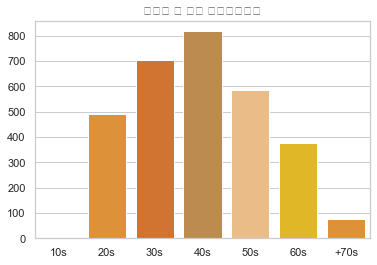

In [19]:
sns.barplot(x=x, y =age_voted, palette = colors)
plt.title('연령대 별 투표 카이제곱분포')

범주형 - 범주형 분석에서 카이제곱분포 = 독립성 검정
10대가 투표와 가장 독립적
70대가 투표와 가장 관계있음

연령대 별 투표 비율과 반비례 관계?
-> 20,30대와 투표의 관계가 40대 보다 깊다
-> 연령대 별 투표 비율과 반대되는 상황

-> 10대의 투표 여부 예측은 정확하지 않을 가능성이 크다

-> 60,70대의 투표 여부 예측은 정확할 가능성이 높다
-> 연령은 투표 예측에 도움이 되는 변수이다 (10대 제외)

연령대만 보면 카이제곱 맞음

연령대 안으로 들어가서 투표여부를 보기에는 범주형인지 잘 모르겠다

각 연령대의 투표 여부는 수치형 변수로 봐도 될듯?!?



### 연령_t-test

In [27]:
import scipy.stats
print(scipy.stats.ttest_ind(a_10['voted'], av_10['voted'],equal_var=False))
print(scipy.stats.ttest_ind(a_20['voted'], av_20['voted'],equal_var=False))
print(scipy.stats.ttest_ind(a_30['voted'], av_30['voted'],equal_var=False))
print(scipy.stats.ttest_ind(a_40['voted'], av_40['voted'],equal_var=False))
print(scipy.stats.ttest_ind(a_50['voted'], av_50['voted'],equal_var=False))
print(scipy.stats.ttest_ind(a_60['voted'], av_60['voted'],equal_var=False))
print(scipy.stats.ttest_ind(a_70['voted'], av_70['voted'],equal_var=False))

Ttest_indResult(statistic=-270.3760417932763, pvalue=0.0)
Ttest_indResult(statistic=-111.79007728301178, pvalue=0.0)
Ttest_indResult(statistic=-73.96793140586628, pvalue=0.0)
Ttest_indResult(statistic=-53.06051095686311, pvalue=0.0)
Ttest_indResult(statistic=-37.704429009628946, pvalue=2.421060910242973e-253)
Ttest_indResult(statistic=-21.07817959816297, pvalue=4.324553640038874e-84)
Ttest_indResult(statistic=-9.15758001200648, pvalue=2.739478273532107e-17)


사실 맞는 방법인지 모르겠다.